# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [95]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [96]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [105]:
# removing outlier
tips.drop(tips[tips['tip_pct'] > 1].index, inplace = True)

In [106]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     54.36
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           2.67e-12
Time:                        17:46:30   Log-Likelihood:                 306.24
No. Observations:                 243   AIC:                            -608.5
Df Residuals:                     241   BIC:                            -601.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2617      0.010     25.335      0.000       0.241       0.282
net_bill      -0.0041      0.001     -7.373      0.000      -0.005      -0.003
==============================================================================
Omnibus:                      122.373   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.982
Skew:                           1.836   Prob(JB):                    9.36e-204
Kurtosis:                      11.880   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

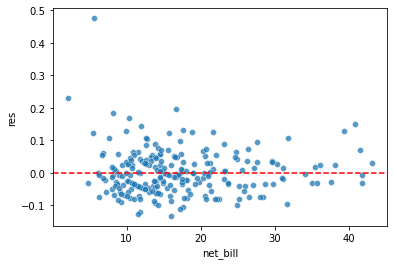

In [107]:
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

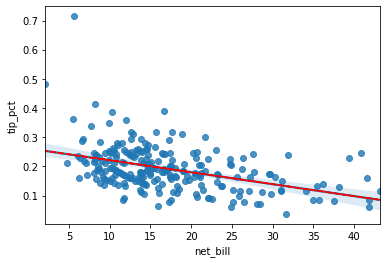

In [108]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     71.81
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           2.38e-15
Time:                        17:46:43   Log-Likelihood:                 313.21
No. Observations:                 243   AIC:                            -622.4
Df Residuals:                     241   BIC:                            -615.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4074      0.026  

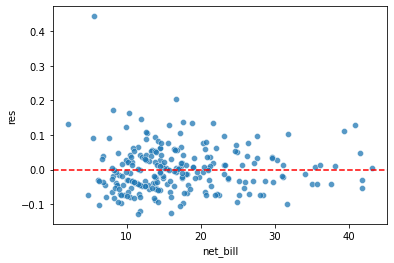

In [109]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     32.18
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           4.17e-13
Time:                        17:46:48   Log-Likelihood:                 310.39
No. Observations:                 243   AIC:                            -614.8
Df Residuals:                     240   BIC:                            -604.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.31

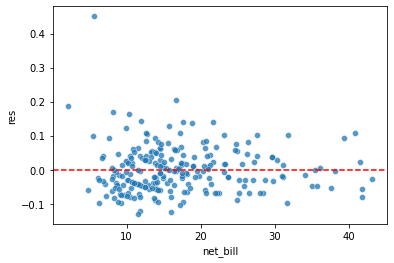

In [110]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

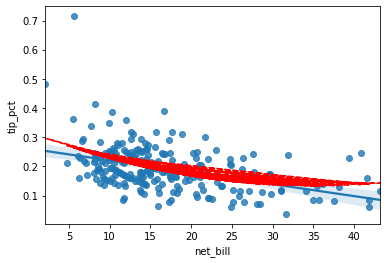

In [111]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     72.35
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.93e-15
Time:                        17:47:03   Log-Likelihood:                -86.585
No. Observations:                 243   AIC:                             177.2
Df Residuals:                     241   BIC:                             184.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3198      0.052    -25.373      0.0

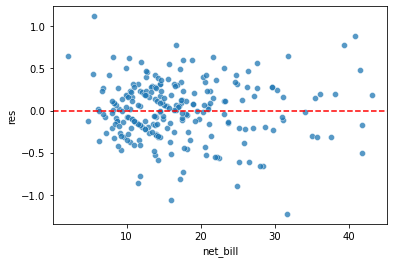

In [112]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

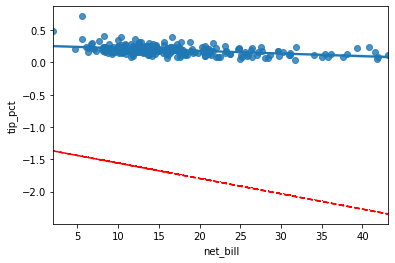

In [113]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.69
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           2.45e-16
Time:                        17:47:43   Log-Likelihood:                -84.531
No. Observations:                 243   AIC:                             173.1
Df Residuals:                     241   BIC:                             180.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5728      0.132  

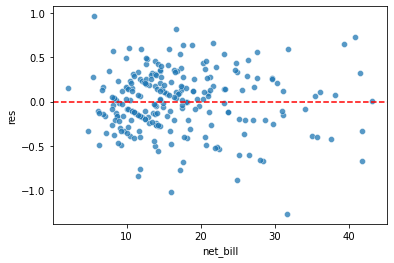

In [114]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  6. qual modelo resultou no melhor ajuste?

<span style="color:blue">O modelo que apresentou o melhor R² foi o item 5, mas ainda muito baixo<p>